In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("new_insurance_data (1).csv")

In [13]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [19]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [21]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [23]:
df.shape

(1338, 13)

In [25]:
df.dropna(inplace=True)

In [27]:
df.shape

(1287, 13)

In [31]:
df.duplicated().sum()

0

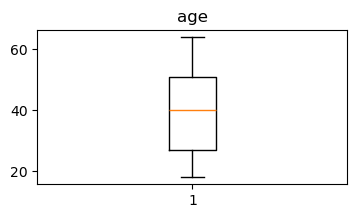

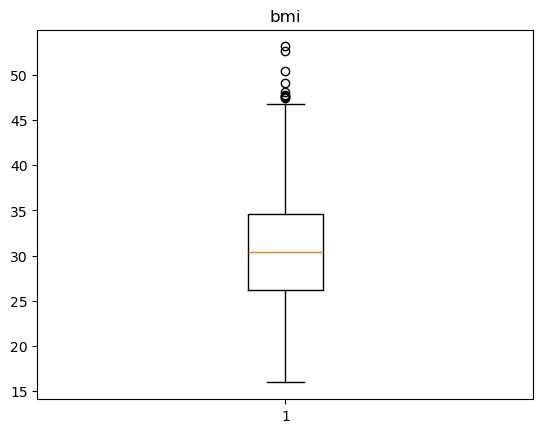

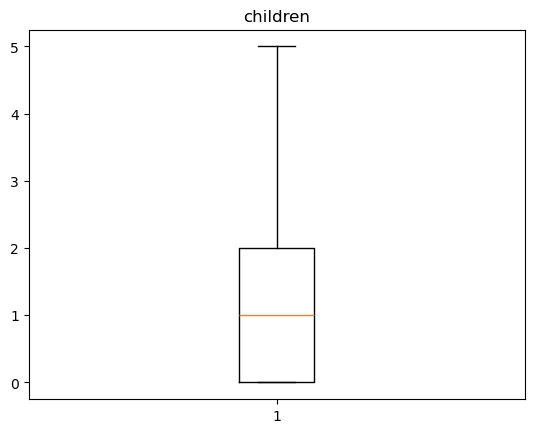

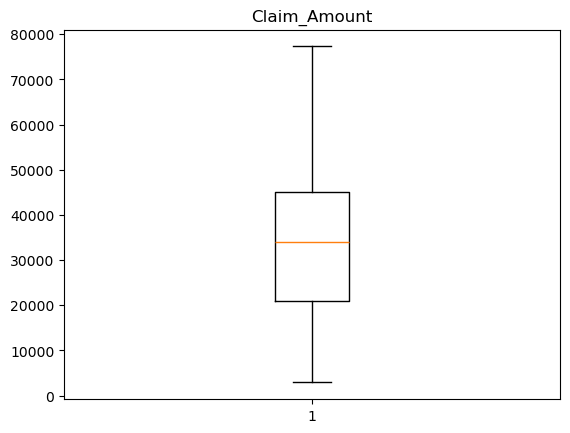

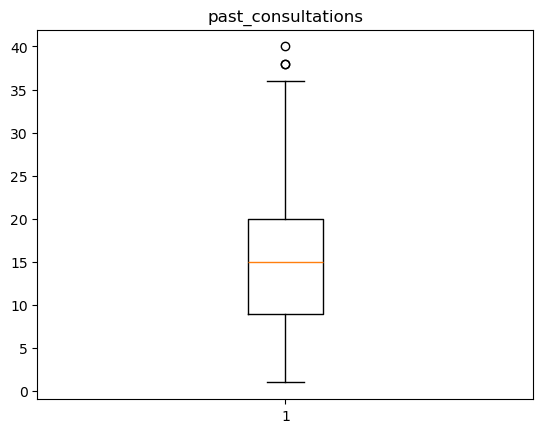

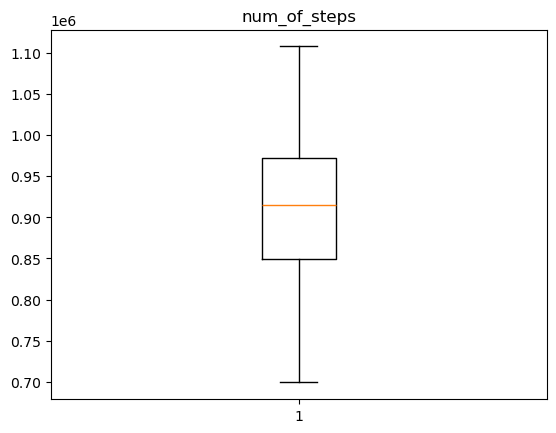

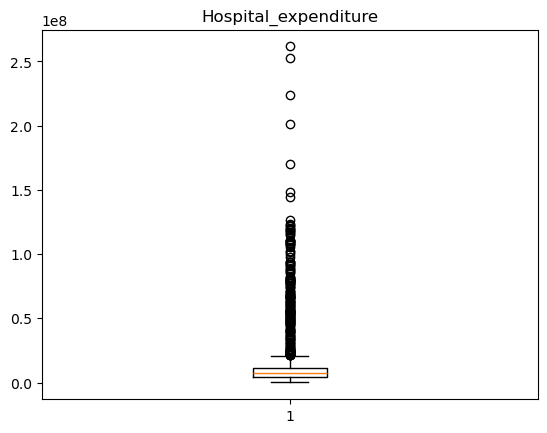

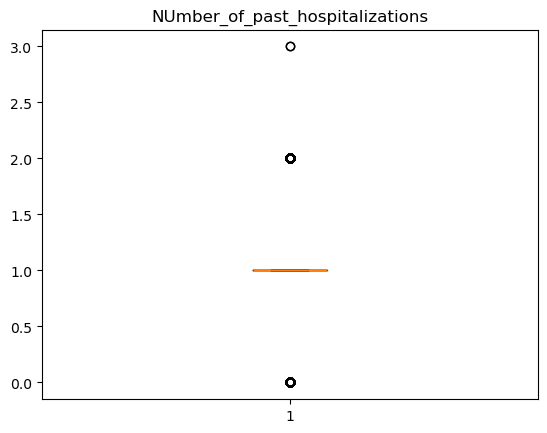

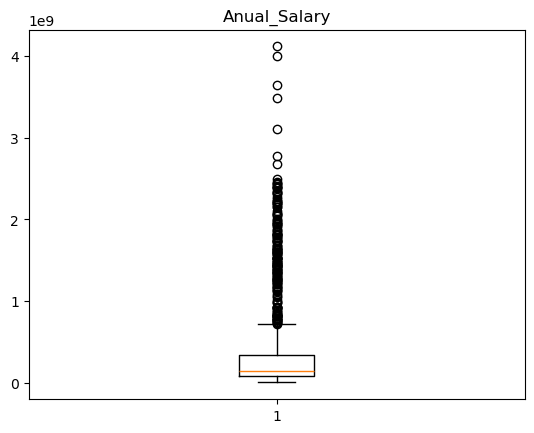

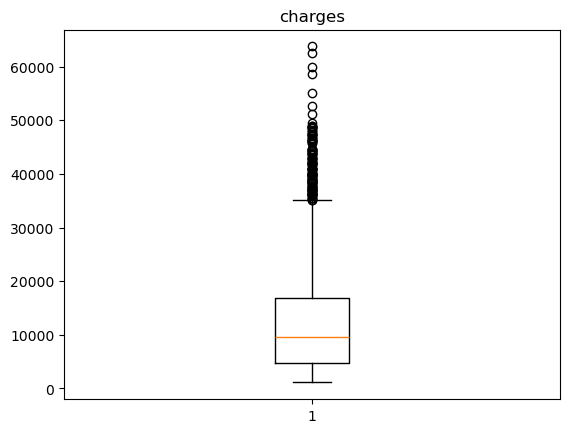

In [45]:
plt.figure(figsize = (4,2))
for col in df.columns:
    if df[col].dtype != 'object':
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()
        

In [ ]:
# columns we need to remove the outlier.
#col=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
int_fet = []
for i in df.columns:
    if df[i].dtype!="object" and i!="charges":
        int_fet.append(i)
int_fet

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [75]:
x = df[int_fet]
x

y = df.loc[:,'charges']
y.shape

(1287,)

In [73]:
x.shape

(1287, 9)

In [77]:
X_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [79]:
y_predict = model.predict(x_test)

In [81]:
result = pd.DataFrame(columns = ['Actual_values', 'Predicted_values'])
result['Actual_values'] = y_test
result['Predicted_values'] = y_predict
result

,Actual_values,Predicted_values
1294,44260.74990,44504.231312
358,4992.37640,5390.043775
980,15006.57945,14474.091729
446,6272.47720,7535.044205
1251,39611.75770,40096.083427
...,...,...
838,11881.96960,11505.962946
571,8023.13545,7941.191177
1035,18765.87545,18800.968676
900,12979.35800,12714.905392


In [83]:
from sklearn.metrics import r2_score

In [85]:
r2_score(y_test, y_predict)*100

99.35424029653075

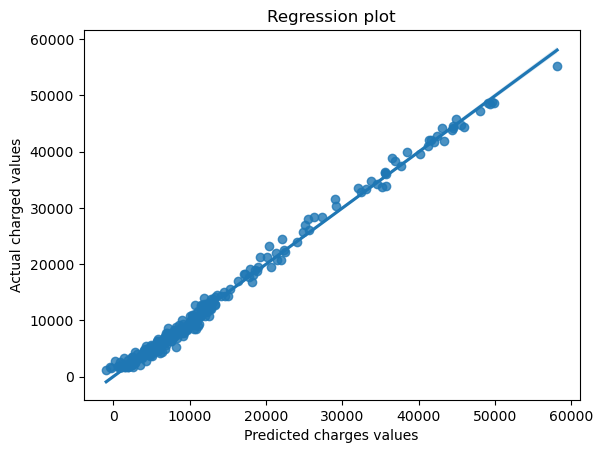

In [87]:
sns.regplot(x = y_predict , y = y_test)
plt.xlabel("Predicted charges values")
plt.ylabel("Actual charged values")
plt.title("Regression plot")
plt.show()